# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

np.random.seed(1234)


def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 4 conflicts.


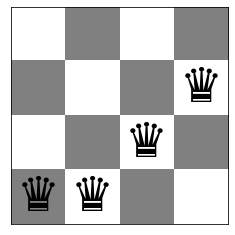

Queens (left to right) are at rows: [3 3 2 1]
Number of conflicts: 4


In [2]:
board = random_board(4)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


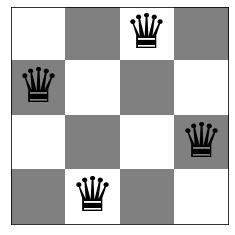

In [3]:
board = [1,3,0,2]
show_board(board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

# ENTER DESCRIPTION HERE

I did quite a bit of research on how to solve the n-queen problem using hill climbing search, and I found the following that guided my implementation: https://letstalkdata.com/2013/12/n-queens-part-1-steepest-hill-climbing/. I also used the class slides to help me with this assignment.

In terms of how the implementation of steepest-ascend works...

In [4]:
# Code and description go here
def find_neighbor_steepest(board):
    possible_moves = {}
    
    for col in range(len(board)):
        curr_move = board[col]
        
        for row in range(len(board)):
            if(board[col] == row):
                continue
            temp = list(board)
            temp[col] = row
            possible_moves[(col, row)] = conflicts(temp)
    best_moves = {}
    best_h = conflicts(board)
    for key, value in possible_moves.items():
        if value < best_h:
            best_h = value
            
    for key, value in possible_moves.items():
        if value == best_h:
            best_moves[key] = value
    # For steepest-ascend you have to choose the highest-valued successors
    if best_moves:
        best_move = min(best_moves.items(), key=lambda x: x[1]) 
        col = best_move[0][0]
        row = best_move[0][1]
        board[col] = row
    
    return board
            


In [5]:
def steepest_hill_climbing(board, verbose = True):
    current = board
    moves = 0
    while conflicts(current) > 0 and moves < len(board)*len(board):
        neighbor = find_neighbor_steepest(board)
        if verbose: show_board(neighbor)
        if(conflicts(neighbor) <= conflicts(current)):
            current = neighbor
        moves += 1    
    return moves

In [6]:
board= random_board(8)

steepest_hill_climbing(board, False)

5

## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

In [7]:
import random

In [8]:
# Code and description go here
def find_neighbor_stochastic(board):
    possible_moves = {}
    
    for col in range(len(board)):
        curr_move = board[col]
        
        for row in range(len(board)):
            if(board[col] == row):
                continue
            temp = list(board)
            temp[col] = row
            possible_moves[(col, row)] = conflicts(temp)
    uphill_moves = {}
    best_h = conflicts(board)
    for key, value in possible_moves.items():
        if value < best_h:
            best_h = value
            
    for key, value in possible_moves.items():
        if value == best_h:
            uphill_moves[key] = value

    if uphill_moves:
        next_move = random.choice(list(uphill_moves.items()))
        col = next_move[0][0]
        row = next_move[0][1]
        board[col] = row
    
    return board
            


In [9]:
# Code and description go here

def stochastic_hill_climbing(board, verbose = True):
    current = board
    moves = 0
    while conflicts(current) > 0 and moves < len(board)*len(board):
        neighbor = find_neighbor_stochastic(board)
        if verbose: show_board(neighbor)
        if(conflicts(neighbor) <= conflicts(current)):
            current = neighbor
        moves += 1    
    return moves

In [10]:
board= random_board(8)

stochastic_hill_climbing(board, False)

8

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

In [11]:
# Code and description go here
# Code and description go here
def find_neighbor_stochastic2(board):
    possible_moves = {}
    
    for col in range(len(board)):
        curr_move = board[col]
        
        for row in range(len(board)):
            if(board[col] == row):
                continue
            temp = list(board)
            temp[col] = row
            possible_moves[(col, row)] = conflicts(temp)
    best_moves = {}
    best_h = conflicts(board)
    for key, value in possible_moves.items():
        if value < best_h:
            best_h = value
            
    for key, value in possible_moves.items():
        if value == best_h:
            best_moves[key] = value
    # For steepest-ascend you have to choose the highest-valued successors
    if best_moves:
        best_move = random.choice(list(best_moves.items()))
        for x in range(int(len(board)/2)):
            curr_move = random.choice(list(best_moves.items()))
            if curr_move[1] < best_move[1]:
                best_move = curr_move
        col = best_move[0][0]
        row = best_move[0][1]
        board[col] = row
    
    return board

In [12]:
# Code and description go here

def stochastic_hill_climbing2(board, verbose = True):
    current = board
    moves = 0
    while conflicts(current) > 0 and moves < len(board)*len(board):
        neighbor = find_neighbor_stochastic2(board)
        if verbose: show_board(neighbor)
        if(conflicts(neighbor) <= conflicts(current)):
            current = neighbor
        moves += 1
    return moves

In [13]:
board= random_board(8)
stochastic_hill_climbing2(board, False)

37

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

In [14]:
import numpy as np

In [15]:
# Code and description go here
def random_restarts(board, n, algorithm, verbose = True):
    best_run = np.inf
    worst_run = 0
    sum_runs = 0
    # Best run, worst run, average run
    values = []
    
    if algorithm == "steepest":
        for runs in range(10):
            curr_run = steepest_hill_climbing(board, False)
            sum_runs += curr_run
            if curr_run < best_run:
                best_run = curr_run
            if curr_run > worst_run:
                worst_run = curr_run
            board = random_board(n)
        if verbose: print("Optimal # of moves for an ", n, "x", n, " board for Steepest Hill: ", best_run)
    elif algorithm == "stochastic":
        for runs in range(10):
            curr_run = stochastic_hill_climbing2(board, False)
            sum_runs += curr_run
            if curr_run < best_run:
                best_run = curr_run
            if curr_run > worst_run:
                worst_run = curr_run
            board = random_board(n)
        if verbose: print("Optimal # of moves for an ", n, "x", n, " board for Stochastic Hill: ", best_run)
    elif algorithm == "stochastic2":
        for runs in range(10):
            curr_run = stochastic_hill_climbing(board, False)
            sum_runs += curr_run
            if curr_run < best_run:
                best_run = curr_run
            if curr_run > worst_run:
                worst_run = curr_run
            board = random_board(n)
        if verbose: print("Optimal # of moves for an ", n, "x", n, " board for Stochastic Hill 2: ", best_run)
    
    average_run = sum_runs/100
    values.append(n)
    values.append(best_run)
    values.append(worst_run)
    values.append(average_run)
    
    return values
    
    

In [16]:
board = random_board(8)
random_restarts(board, 8, "steepest")

Optimal # of moves for an  8 x 8  board for Steepest Hill:  5


[8, 5, 64, 4.08]

In [17]:
board = random_board(8)
random_restarts(board, 8, "stochastic")

Optimal # of moves for an  8 x 8  board for Stochastic Hill:  5


[8, 5, 64, 2.29]

In [18]:
board = random_board(8)
random_restarts(board, 8, "stochastic2")

Optimal # of moves for an  8 x 8  board for Stochastic Hill 2:  5


[8, 5, 64, 2.49]

## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

In [19]:
from prettytable import PrettyTable

In [20]:
t = PrettyTable(['Algorithm', 'Board Size' ,'Best Run (# Moves)', 'Worst Run (# Moves)', 'Average Run (# Moves)'])

In [21]:
values = random_restarts(board, 4, "steepest")
t.add_row(['Steepest Hill', values[0], values[1], values[2], values[3]])

values = random_restarts(board, 8, "steepest")
t.add_row(['Steepest Hill',values[0], values[1], values[2], values[3]])

values = random_restarts(board, 20, "steepest")
t.add_row(['Steepest Hill', values[0], values[1], values[2], values[3]])

values = random_restarts(board, 32, "steepest")
t.add_row(['Steepest Hill', values[0], values[1], values[2], values[3]])

Optimal # of moves for an  4 x 4  board for Steepest Hill:  1
Optimal # of moves for an  8 x 8  board for Steepest Hill:  5
Optimal # of moves for an  20 x 20  board for Steepest Hill:  12
Optimal # of moves for an  32 x 32  board for Steepest Hill:  18


In [22]:
values = random_restarts(board, 4, "stochastic")
t.add_row(['Stochastic Hill', values[0], values[1], values[2], values[3]])

values = random_restarts(board, 8, "stochastic")
t.add_row(['Stochastic Hill',values[0], values[1], values[2], values[3]])

values = random_restarts(board, 20, "stochastic")
t.add_row(['Stochastic Hill', values[0], values[1], values[2], values[3]])

values = random_restarts(board, 30, "stochastic")
t.add_row(['Stochastic Hill', values[0], values[1], values[2], values[3]])

Optimal # of moves for an  4 x 4  board for Stochastic Hill:  2
Optimal # of moves for an  8 x 8  board for Stochastic Hill:  4
Optimal # of moves for an  20 x 20  board for Stochastic Hill:  10
Optimal # of moves for an  30 x 30  board for Stochastic Hill:  21


In [23]:
values = random_restarts(board, 4, "stochastic2")
t.add_row(['Stochastic Hill 2', values[0], values[1], values[2], values[3]])

values = random_restarts(board, 8, "stochastic2")
t.add_row(['Stochastic Hill 2',values[0], values[1], values[2], values[3]])

values = random_restarts(board, 20, "stochastic2")
t.add_row(['Stochastic Hill 2', values[0], values[1], values[2], values[3]])

values = random_restarts(board, 30, "stochastic2")
t.add_row(['Stochastic Hill 2', values[0], values[1], values[2], values[3]])

Optimal # of moves for an  4 x 4  board for Stochastic Hill 2:  1
Optimal # of moves for an  8 x 8  board for Stochastic Hill 2:  4
Optimal # of moves for an  20 x 20  board for Stochastic Hill 2:  19
Optimal # of moves for an  30 x 30  board for Stochastic Hill 2:  17


In [31]:
from prettytable import MARKDOWN
from IPython.display import display, Markdown, Latex
t.align = "c"
t.set_style(MARKDOWN)
display(t)

Algorithm,Board Size,Best Run (# Moves),Worst Run (# Moves),Average Run (# Moves)
Steepest Hill,4,1,64,0.87
Steepest Hill,8,5,64,5.25
Steepest Hill,20,12,400,28.9
Steepest Hill,32,18,1024,72.7
Stochastic Hill,4,2,64,0.92
Stochastic Hill,8,4,64,2.32
Stochastic Hill,20,10,88,3.55
Stochastic Hill,30,21,72,3.55
Stochastic Hill 2,4,1,64,0.9
Stochastic Hill 2,8,4,64,2.49


In [25]:
import pandas as pd 

In [35]:
# Convert Table to Pandas Dataframe for Graph Purposes
with open('output.csv', 'w', newline='') as f_output:
    f_output.write(t.get_csv_string())
f_output.close()
    
df = pd.read_csv('output.csv')

In [36]:
df

,Algorithm,Board Size,Best Run (# Moves),Worst Run (# Moves),Average Run (# Moves)
0,Steepest Hill,4,1,64,0.87
1,Steepest Hill,8,5,64,5.25
2,Steepest Hill,20,12,400,28.90
3,Steepest Hill,32,18,1024,72.70
4,Stochastic Hill,4,2,64,0.92
5,Stochastic Hill,8,4,64,2.32
6,Stochastic Hill,20,10,88,3.55
7,Stochastic Hill,30,21,72,3.55
8,Stochastic Hill 2,4,1,64,0.90
9,Stochastic Hill 2,8,4,64,2.49
